# Problem Statement
In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA


## Data Preprocessing 

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
#shape of the data
X.shape

(150, 4)

In [5]:
#Features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Feature scaling prior to applying PCA

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print('shape of scaled data points:')
print('---------------------------------------------------------------------------')
print(X_scaled.shape)
print('first 5 rows of scaled data points :')
print('---------------------------------------------------------------------------')
print(X_scaled[:5,:])
print('first 5 rows of original data points :')
print('---------------------------------------------------------------------------')
print(X[:5,:])

shape of scaled data points:
---------------------------------------------------------------------------
(150, 4)
first 5 rows of scaled data points :
---------------------------------------------------------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
first 5 rows of original data points :
---------------------------------------------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Applying PCA

In [18]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_transformed = pca.transform(X)
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X.shape)
print('--------------------------------------------------------------------')
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])

[[ 2.66923088  5.18088722 -2.50606121]
 [ 2.69643401  4.6436453  -2.48287429]
 [ 2.4811633   4.75218345 -2.30435358]
 [ 2.57151243  4.62661492 -2.22827673]
 [ 2.59065822  5.23621104 -2.40975624]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(150, 3)
--------------------------------------------------------------------
Original Feature shape :
--------------------------------------------------------------------
(150, 4)
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 2.66923088  5.18088722 -2.50606121]
 [ 2.69643401  4.6436453  -2.48287429]
 [ 2.4811633   4.75218345 -2.30435358]
 [ 2.57151243  4.62661492 -2.22827673]
 [ 2.59065822  5.23621104 -2.40975624]]


#### Note :
Transformed from 4D to 3D using PCA

In [19]:
print('First Principal Component PC1: ',pca.components_[0])
print('\nSecond Principal Component PC2: ',pca.components_[1])
print('\nThird Principal Component PC3: ',pca.components_[2])

First Principal Component PC1:  [ 0.52237162 -0.26335492  0.58125401  0.56561105]

Second Principal Component PC2:  [0.37231836 0.92555649 0.02109478 0.06541577]

Third Principal Component PC3:  [-0.72101681  0.24203288  0.14089226  0.6338014 ]


## Component Visualization

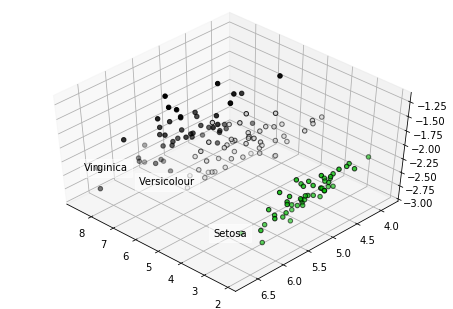

In [20]:
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_transformed[y == label, 0].mean(),
              X_transformed[y == label, 1].mean() + 1.5,
              X_transformed[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.show()